In [1]:
%matplotlib inline

import os
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

PROJECTS = ['ant-ivy', 'archiva', 'calcite', 'cayenne', 'commons-bcel', 'commons-beanutils',
            'commons-codec', 'commons-collections', 'commons-compress', 'commons-configuration',
            'commons-dbcp', 'commons-digester', 'commons-io', 'commons-jcs', 'commons-jexl',
            'commons-lang', 'commons-math', 'commons-net', 'commons-scxml', 
            'commons-validator', 'commons-vfs', 'deltaspike', 'eagle', 'giraph', 'gora', 'jspwiki',
            'knox', 'kylin', 'lens', 'mahout', 'manifoldcf','nutch','opennlp','parquet-mr',
            'santuario-java', 'systemml', 'tika', 'wss4j']

DATA_PATH = '../data/'
FIGURES_PATH = '../figures/'

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
r = pd.read_csv('{}/train_test_all.csv'.format(DATA_PATH))

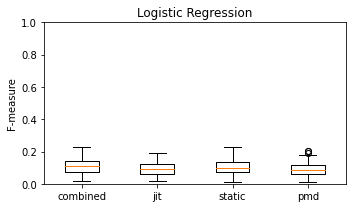

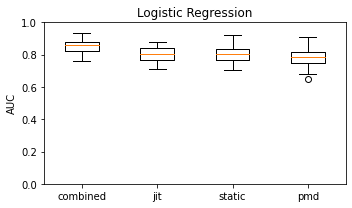

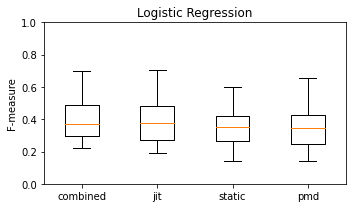

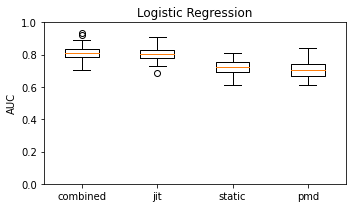

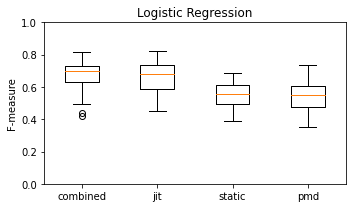

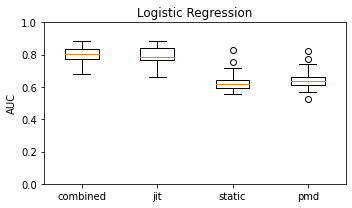

In [3]:
for plot_name, lbl_name in zip(['bug', 'ad-hoc', 'commit'], ['bug_label', 'adhoc_label', 'pascarella_commit']):
    for pn1, ms1 in [('F-measure', 'lr_f1'), ('AUC', 'lr_roc_auc')]:
        fig = plt.figure(figsize=(5,3))
        ax = fig.add_subplot(111)
        plt.title('Logistic Regression')
        bp = []
        names = []
        for pn, ms in [('combined', 'jit_static_pmd'), ('jit', 'jit'), ('static', 'static'), ('pmd', 'pmd')]:
            bp.append(r[(r['metric_set'] == ms) & (r['label'] == lbl_name)][ms1].values)
            names.append(pn)
        ax.boxplot(bp)
        ax.set_xticklabels(names)
        ax.set_ylabel(pn1)
        ax.set_ylim([0,1])
        #plt.show()
        plt.tight_layout()
        plt.savefig(FIGURES_PATH + '/tt_{}_{}.pdf'.format(ms1, lbl_name))

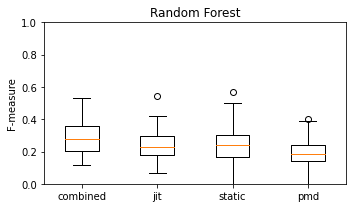

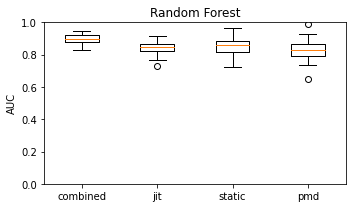

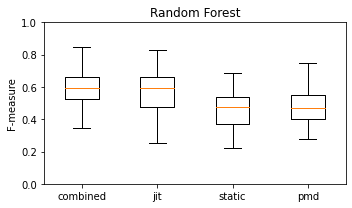

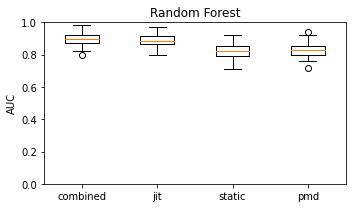

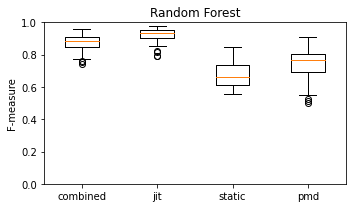

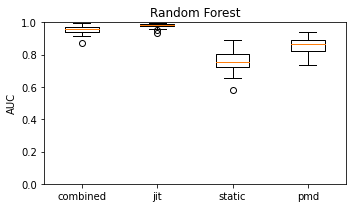

In [4]:
for plot_name, lbl_name in zip(['bug', 'ad-hoc', 'commit'], ['bug_label', 'adhoc_label', 'pascarella_commit']):
    for pn1, ms1 in [('F-measure', 'rf_f1'), ('AUC', 'rf_roc_auc')]:
        fig = plt.figure(figsize=(5,3))
        ax = fig.add_subplot(111)
        plt.title('Random Forest')
        bp = []
        names = []
        for pn, ms in [('combined', 'jit_static_pmd'), ('jit', 'jit'), ('static', 'static'), ('pmd', 'pmd')]:
            bp.append(r[(r['metric_set'] == ms) & (r['label'] == lbl_name)][ms1].values)
            names.append(pn)
        ax.boxplot(bp)
        ax.set_xticklabels(names)
        ax.set_ylabel(pn1)
        ax.set_ylim([0,1])
        #plt.show()
        plt.tight_layout()
        plt.savefig(FIGURES_PATH + '/tt_{}_{}.pdf'.format(ms1, lbl_name))

# Statistical test for jit / combined comparison

In [5]:
for label in r['label'].unique():
    jit = r[(r['metric_set'] == 'jit') & (r['label'] == label)]
    combined = r[(r['metric_set'] == 'jit_static_pmd') & (r['label'] == label)]
    
    rf_f1_j = jit['rf_f1'].values
    rf_f1_c = combined['rf_f1'].values
    rf_auc_j = jit['rf_roc_auc'].values
    rf_auc_c = combined['rf_roc_auc'].values
    
    lr_f1_j = jit['lr_f1'].values
    lr_f1_c = combined['lr_f1'].values
    lr_auc_j = jit['lr_roc_auc'].values
    lr_auc_c = combined['lr_roc_auc'].values

    print(label)
    rf_f1_stat, rf_f1_pval = stats.ttest_rel(rf_f1_j, rf_f1_c)
    rf_auc_stat, rf_auc_pval = stats.ttest_rel(rf_auc_j, rf_auc_c)

    lr_f1_stat, lr_f1_pval = stats.ttest_rel(lr_f1_j, lr_f1_c)
    lr_auc_stat, lr_auc_pval = stats.ttest_rel(lr_auc_j, lr_auc_c)

    print('rf f1 {:.6f}'.format(rf_f1_pval))
    print('rf auc {:.6f}'.format(rf_auc_pval))
    print('lr f1 {:.6f}'.format(lr_f1_pval))
    print('lr auc {:.6f}'.format(lr_auc_pval))
    
    print(stats.shapiro(rf_f1_j), stats.shapiro(rf_f1_c))
    print(stats.shapiro(rf_auc_j), stats.shapiro(rf_auc_c))
    print(stats.shapiro(lr_f1_j), stats.shapiro(lr_f1_c))
    print(stats.shapiro(lr_auc_j), stats.shapiro(lr_auc_c))

    print(stats.levene(rf_f1_j, rf_f1_c))
    print(stats.levene(rf_auc_j, rf_auc_c))
    print(stats.levene(lr_f1_j, lr_f1_c))
    print(stats.levene(lr_auc_j, lr_auc_c))
    print('--')

pascarella_commit
rf f1 0.000000
rf auc 0.000000
lr f1 0.147136
lr auc 0.404896
(0.8672144412994385, 0.0003422721056267619) (0.927939236164093, 0.017283549532294273)
(0.8491272330284119, 0.0001243463921127841) (0.9137616157531738, 0.006383723579347134)
(0.9536406397819519, 0.1174105629324913) (0.9281598925590515, 0.01756054162979126)
(0.9566235542297363, 0.14720317721366882) (0.9671829342842102, 0.3215918242931366)
LeveneResult(statistic=1.0038631875947828, pvalue=0.3196426032123264)
LeveneResult(statistic=5.576021564705544, pvalue=0.02084206311732922)
LeveneResult(statistic=0.14537379080492732, pvalue=0.7040886543451326)
LeveneResult(statistic=0.16210095908899957, pvalue=0.6883902773200444)
--
adhoc_label
rf f1 0.166101
rf auc 0.001236
lr f1 0.075867
lr auc 0.021969
(0.9793491959571838, 0.6944456696510315) (0.9728671908378601, 0.4743971526622772)
(0.9848114252090454, 0.8755427002906799) (0.9793515205383301, 0.6945275664329529)
(0.9480401277542114, 0.0767473578453064) (0.93663895130157

# Cost model

In [6]:
dats = []
for project in r['project'].unique():
    for plot_name, lbl_name in zip(['bug', 'adhoc'], ['bug_label', 'adhoc_label']):
        df = r[(r['label'] == lbl_name) & (r['metric_set'] != 'jit_statc') & (r['project'] == project)].copy()
        for metric_set in df['metric_set'].unique():
            tmp = df[df['metric_set'] == metric_set]
            dats.append({'classifier': 'Random Forest', 'project': project, 'feature_set': metric_set, 'ub': tmp['rf_ub'].values[0], 'lb': tmp['rf_lb'].values[0], 'label': plot_name})
            dats.append({'classifier': 'Logistic Regression', 'project': project, 'feature_set': metric_set, 'ub': tmp['lr_ub'].values[0], 'lb': tmp['lr_lb'].values[0], 'label': plot_name})

test = pd.DataFrame(dats)

print('projects', test['project'].nunique())
for label in test['label'].unique():
    for cl in test['classifier'].unique():
        for ms in test['feature_set'].unique():
            if ms not in ['jit', 'jit_static_pmd']:
                continue
            tmp = test[(test['label'] == label) & (test['classifier'] == cl) & (test['feature_set'] == ms) & (np.isfinite(test['ub'])) & (np.isfinite(test['lb'])) & (test['ub'] > test['lb'])]
            s = np.sum(tmp['ub'] - tmp['lb'])
            print(label, cl, ms, len(tmp))

projects 38
bug Random Forest jit 27
bug Random Forest jit_static_pmd 34
bug Logistic Regression jit 32
bug Logistic Regression jit_static_pmd 33
adhoc Random Forest jit 30
adhoc Random Forest jit_static_pmd 34
adhoc Logistic Regression jit 30
adhoc Logistic Regression jit_static_pmd 33


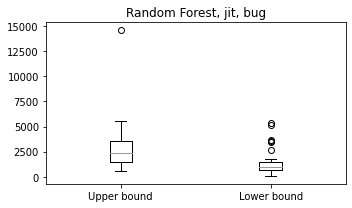

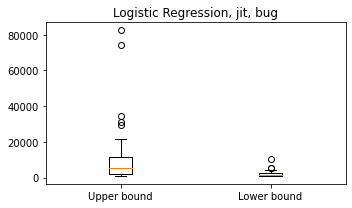

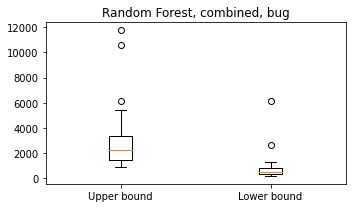

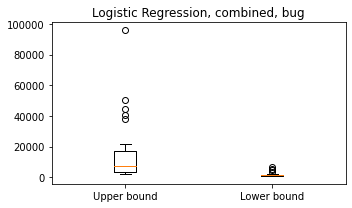

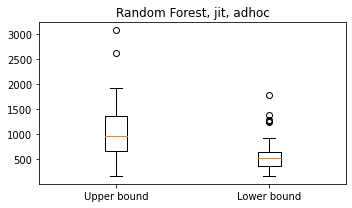

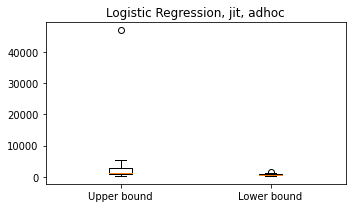

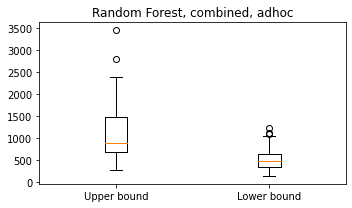

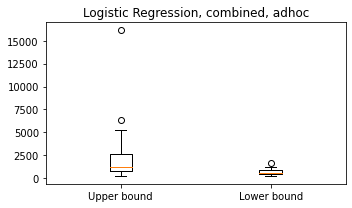

In [7]:
for label in test['label'].unique():
    for ms in test['feature_set'].unique():
        if ms not in ['jit', 'jit_static_pmd']:
            continue
        plot_name = 'jit'
        if ms == 'jit_static_pmd':
            plot_name = 'combined'
        for cl in test['classifier'].unique():
            short_name = 'lr'
            if cl == 'Random Forest':
                short_name = 'rf'
            
            fig = plt.figure(figsize=(5,3))
            ax = fig.add_subplot(111)
            plt.title('{}, {}, {}'.format(cl, plot_name, label))
            tmp = test[(test['label'] == label) & (test['classifier'] == cl) & (np.isfinite(test['ub'])) & (np.isfinite(test['lb'])) & (test['feature_set'] == ms)]
            
            bp = []
            names = []
            bp.append(tmp['ub'].values)
            names.append('Upper bound')
            bp.append(tmp['lb'].values)
            names.append('Lower bound')

            ax.boxplot(bp)    
            ax.set_xticklabels(names)
            # ax.set_ylabel()
            # ax.set_ylim([0,1])
            plt.tight_layout()
            
            plt.savefig(FIGURES_PATH + '/bounds_{}_{}_{}.pdf'.format(short_name, plot_name, label))
            # plt.show()